In [24]:
import numpy as np
import scipy.signal as sig
import scipy.io.wavfile as scw
import matplotlib.pyplot as plt

In [25]:
# 自己相関関数
# r(m) = sum( x(n)*x(n+m) ) n=0~N-m-1, m=0~N-1
def auto_correlate(dt):
    cor = sig.correlate(dt,dt,mode="full")
    return cor[int(cor.size/2):]

# 初出peakの検出
# 愚直過ぎる..(´・ω・`)
def calc_first_peak_index(array):
    i = 0
    while array[i] > array[i+1]:
        i += 1
    while array[i] < array[i+1]:
        i += 1
    return i

In [26]:
src_name = 'piano.wav' 

fs, dt = scw.read(src_name)
dt = dt / (2 ** 15)
ts = 1 / fs

/tmp/ipykernel_2126/2754908968.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, dt = scw.read(src_name)


461.53846153846155


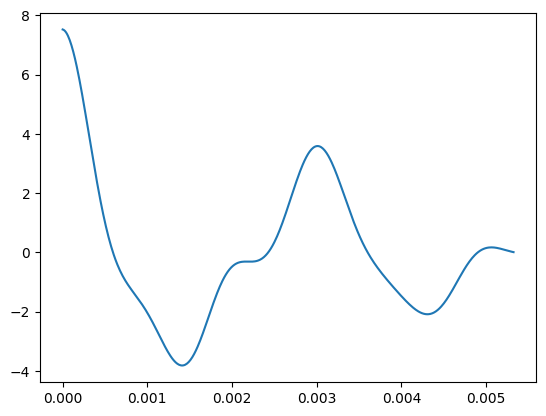

In [27]:
# 自己相関係数の計算
win_size = 2 ** 9 # 512
N = 2 ** 9
start = 1000
   
cor = auto_correlate(dt[start:start+N])
peak_index = calc_first_peak_index(cor)
freq = 1 / (peak_index * ts)
print(freq)

plt.plot(np.arange(cor.size) * ts, cor)
plt.show()